# Constrained Local Models - Basics
The aim of this notebook is to showcase how one can build and fit CLMs to images using ``menpofit``.

Note that this notebook assumes that the user has previously gone through the AAMs Basics notebook and he/she is already familiar with the basics of `Menpo`'s Deformable Model Fitting framework explained in there.

## 1. Loading data

In [1]:
%matplotlib inline

path_to_lfpw = '/vol/atlas/databases/lfpw/'

In [2]:
import menpo.io as mio

training_images = []
# load landmarked images
for i in mio.import_images(path_to_lfpw + 'trainset/*', verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.1)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    training_images.append(i)

Importing assets: [==========] 100% (811/811) - 00:00:00 remaining


:0: FutureWarning: IPython widgets are experimental and may change in the future.


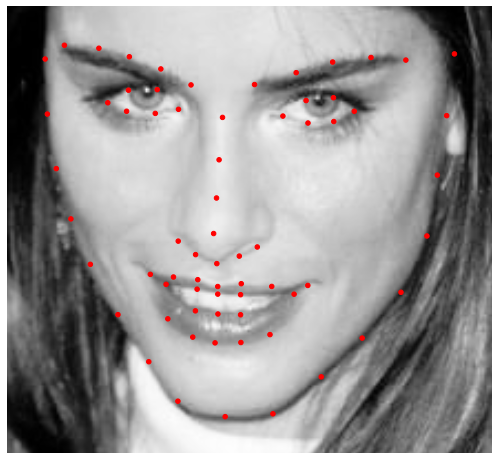

In [3]:
from menpo.visualize import visualize_images

visualize_images(training_images)

## 2. Build a CLM with default parameters

Building a CLM using `Menpo` can be done using a single line of code.

In [4]:
from menpofit.clm import CLMBuilder

clm = CLMBuilder().build(training_images, verbose=True)

- Normalizing images size: Done
- Building model for each of the 3 pyramid levels
  - Level 1: Done
  - Level 2: Done
  - Level 3: Done


In [5]:
print(clm)

Constrained Local Model
 - 811 training images.
 - Gaussian pyramid with 3 levels and downscale factor of 1.1.
   - Each level has a scaled shape model (reference frame).
   - Patch size is 5W x 5H.
   - Pyramid was applied on feature space.
   - Feature is sparse_hog with 36 channels per image.
   - Level 1 (no downscale): 
     - 133 shape components (100.00% of variance)
     - 68 linear_svm_lr classifiers.
   - Level 2 (downscale by 1.1): 
     - 133 shape components (100.00% of variance)
     - 68 linear_svm_lr classifiers.
   - Level 3 (downscale by 1.21): 
     - 133 shape components (100.00% of variance)
     - 68 linear_svm_lr classifiers.



## 3. Fit the previous CLM

In `Menpo`, CLMs can be fitted to images by creating `Fitter` objects around them. 

One of the most popular algorithms for fitting CLMs is the `Regularized Landmark Mean-Shift` algorithm. In order to fit our CLM using this algorithm using `Menpo`, the user needs to define a `GradientDescentCLMFitter` object. This can be done again using a single line of code!!!

In [6]:
from menpofit.clm import GradientDescentCLMFitter

fitter = GradientDescentCLMFitter(clm, n_shape=[3, 6, 12])

It is important to know that `GradientDescentCLMFitter` objects can be printed just like any other type `Fitter` object: 

In [7]:
print(fitter)

Constrained Local Model Fitter
 - Gradient-Descent RLMS
 - Transform is OrthoPDM.
 - 811 training images.
 - Gaussian pyramid with 3 levels and downscale factor of 1.1.
   - Each level has a scaled shape model (reference frame).
   - Patch size is 5W x 5H.
   - Pyramid was applied on feature space.
   - Feature is sparse_hog with 36 channels per image.
   - Level 1 (no downscale): 
     - 16 motion components
     - 68 linear_svm_lr classifiers.
   - Level 2 (downscale by 1.1): 
     - 10 motion components
     - 68 linear_svm_lr classifiers.
   - Level 3 (downscale by 1.21): 
     - 7 motion components
     - 68 linear_svm_lr classifiers.



Fitting a `GradientDescentCLMFitter` to an image is as simple as calling its `fit` method. Let's try it by fitting some images of the LFPW database test set!!!

In [8]:
import menpo.io as mio

# load test images
test_images = []
for i in mio.import_images(path_to_lfpw + 'testset/*.png', max_images=5, verbose=True):
    # crop image
    i = i.crop_to_landmarks_proportion(0.5)
    # convert it to grayscale if needed
    if i.n_channels == 3:
        i = i.as_greyscale(mode='luminosity')
    # append it to the list
    test_images.append(i)

Importing assets: [==========] 100% (5/5) - 00:00:00 remaining


Note that for the purpose of this simple fitting demonstration we will just fit the first 5 images of the LFPW test set.

In [12]:
fitting_results = []

# fit images
for j, i in enumerate(test_images):
    # obtain original landmarks
    gt_s = i.landmarks['PTS'].lms
    # generate perturbed landmarks
    s = fitter.perturb_shape(gt_s)
    # fit image
    fr = fitter.fit(i, s, gt_shape=gt_s) 
    # append fitting result to list
    fitting_results.append(fr)
    # print image numebr
    print('Image: ', j)
    # print fitting error
    print(fr)

('Image: ', 0)
Fitting Result
 - Initial error: 0.0799
 - Final error: 0.0230
 - GD-CLM-RLMS method with 3 pyramid levels, 43 iterations and using sparse_hog features.
('Image: ', 1)
Fitting Result
 - Initial error: 0.0623
 - Final error: 0.0180
 - GD-CLM-RLMS method with 3 pyramid levels, 44 iterations and using sparse_hog features.
('Image: ', 2)
Fitting Result
 - Initial error: 0.0318
 - Final error: 0.0395
 - GD-CLM-RLMS method with 3 pyramid levels, 39 iterations and using sparse_hog features.
('Image: ', 3)
Fitting Result
 - Initial error: 0.0947
 - Final error: 0.0291
 - GD-CLM-RLMS method with 3 pyramid levels, 39 iterations and using sparse_hog features.
('Image: ', 4)
Fitting Result
 - Initial error: 0.0709
 - Final error: 0.0340
 - GD-CLM-RLMS method with 3 pyramid levels, 43 iterations and using sparse_hog features.


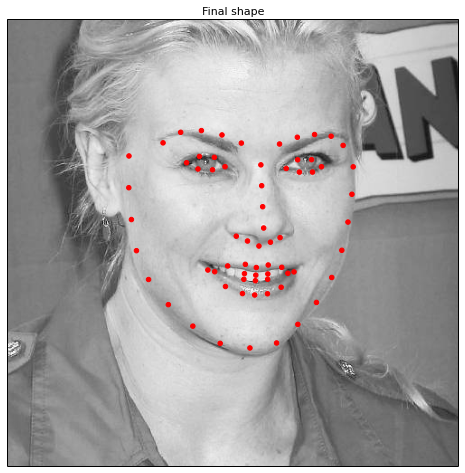

In [13]:
from menpofit.visualize import visualize_fitting_result

visualize_fitting_result(fitting_results)